In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

(X_train, y_train), (X_test, y_test) = cifar100.load_data()

X_train_resnet50 = preprocess_resnet50(X_train)
X_test_resnet50 = preprocess_resnet50(X_test)

X_train_vgg16 = preprocess_vgg16(X_train)
X_test_vgg16 = preprocess_vgg16(X_test)

X_train_mobilenetv2 = preprocess_mobilenetv2(X_train)
X_test_mobilenetv2 = preprocess_mobilenetv2(X_test)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/tmp/ipython-input-3794676327.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True

history_resnet50 = model_resnet50.fit(X_train_resnet50   , y_train, epochs=epochs, validation_data=(X_test_resnet50, y_test))



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True

history_vgg16 = model_vgg16.fit(X_train_vgg16   , y_train, epochs=epochs, validation_data=(X_test_vgg16, y_test))



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True

history_mobilenetv2 = model_mobilenetv2.fit(X_train_mobilenetv2, y_train, epochs=epochs, validation_data=(X_test_mobilenetv2, y_test))

178
22
157
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1347s 854ms/step - accuracy: 0.2829 - loss: 3.0479 - val_accuracy: 0.3914 - val_loss: 2.4185
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1334s 849ms/step - accuracy: 0.4700 - loss: 1.9784 - val_accuracy: 0.4312 - val_loss: 2.2902
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1341s 848ms/step - accuracy: 0.5716 - loss: 1.5207 - val_accuracy: 0.4387 - val_loss: 2.3461
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 813s 519ms/step - accuracy: 0.0658 - loss: 6.5792 - val_accuracy: 0.0641 - val_loss: 4.0933
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 783s 501ms/step - accuracy: 0.0641 - loss: 3.9650 - val_accuracy: 0.0975 - val_loss: 3.6355
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 802s 501ms/step - accuracy: 0.1026 - loss: 3.5637 - val_accuracy: 0.1371 - val_loss: 3.3588
Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 193s 116ms/step - accuracy: 0.1322 - loss: 3.8128 - val_accuracy: 0.0823 - val_loss: 5.2023
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 108ms/ste

In [6]:
acc_resnet50    = model_resnet50.evaluate(X_test_resnet50, y_test)[1]
acc_vgg16       = model_vgg16.evaluate(X_test_vgg16, y_test)[1]
acc_mobilenetv2 = model_mobilenetv2.evaluate(X_test_mobilenetv2, y_test)[1]

print(f'ResNet50 Accuracy: {acc_resnet50:.2f}')
print(f'VGG16 Accuracy: {acc_vgg16:.2f}')
print(f'MobileNetV2 Accuracy: {acc_mobilenetv2:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 149ms/step - accuracy: 0.4416 - loss: 2.3499
313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 384ms/step - accuracy: 0.1342 - loss: 3.3509
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.2126 - loss: 3.6119
ResNet50 Accuracy: 0.44
VGG16 Accuracy: 0.14
MobileNetV2 Accuracy: 0.21


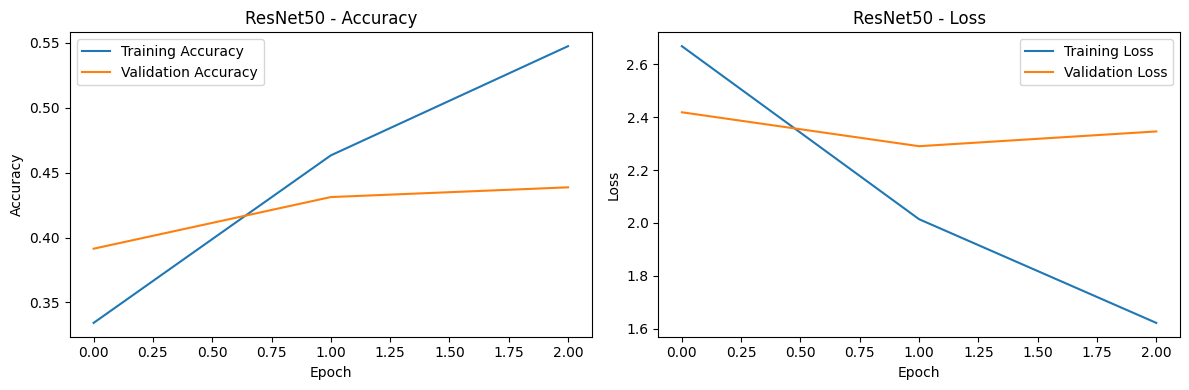

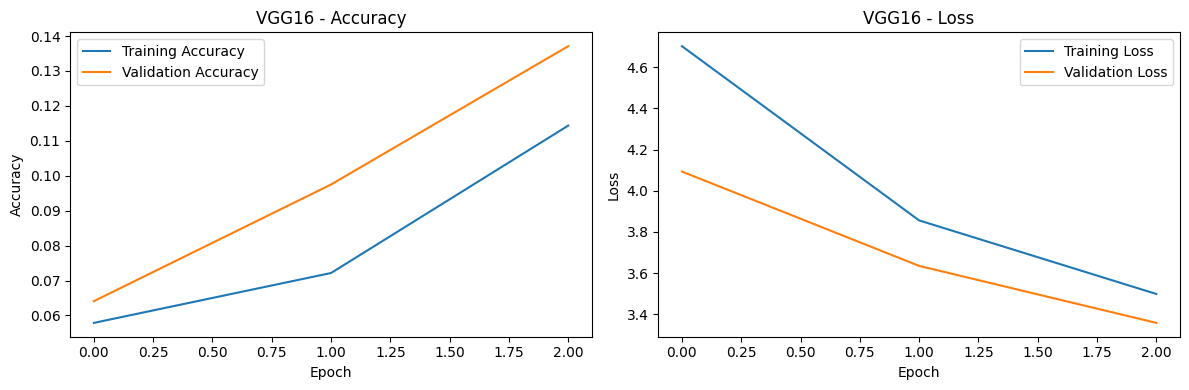

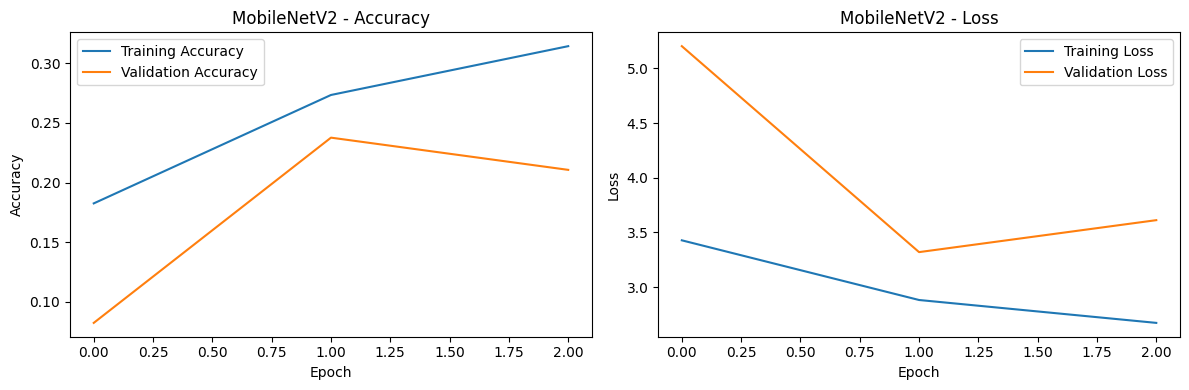

In [7]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

In [8]:
history_resnet50 = model_resnet50.fit(X_train_resnet50, y_train, epochs=22, validation_data=(X_test_resnet50, y_test))

Epoch 1/22
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1346s 861ms/step - accuracy: 0.6600 - loss: 1.1839 - val_accuracy: 0.4523 - val_loss: 2.5051
Epoch 2/22
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1435s 882ms/step - accuracy: 0.7394 - loss: 0.8754 - val_accuracy: 0.4387 - val_loss: 2.8052
Epoch 3/22
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1334s 854ms/step - accuracy: 0.7994 - loss: 0.6722 - val_accuracy: 0.4455 - val_loss: 3.1501
Epoch 4/22
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1368s 875ms/step - accuracy: 0.8337 - loss: 0.5630 - val_accuracy: 0.4465 - val_loss: 3.4265
Epoch 5/22
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1320s 844ms/step - accuracy: 0.8513 - loss: 0.5018 - val_accuracy: 0.4364 - val_loss: 3.7153
Epoch 6/22
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1317s 842ms/step - accuracy: 0.8714 - loss: 0.4348 - val_accuracy: 0.4390 - val_loss: 3.8452
Epoch 7/22
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1315s 841ms/step - accuracy: 0.8771 - loss: 0.4162 - val_accuracy: 0.4300 - val_loss: 4.1124
Epoch 8/22
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1323s 847ms/s

KeyboardInterrupt: 

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet50
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mobilenetv2

In [10]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ZOEE8D_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ZOEE8D_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.ZOEE8D_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see

In [11]:
# split the dataset into training and testing sets for each of the three models
train_dataset_resnet50 = train_dataset.map(lambda x, y: (preprocess_resnet50(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))
validation_dataset_resnet50 = validation_dataset.map(lambda x, y: (preprocess_resnet50(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))
test_dataset_resnet50 = test_dataset.map(lambda x, y: (preprocess_resnet50(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))

train_dataset_vgg16 = train_dataset.map(lambda x, y: (preprocess_vgg16(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))
validation_dataset_vgg16 = validation_dataset.map(lambda x, y: (preprocess_vgg16(tf.image.resize(x, (32, 32))), y))
test_dataset_vgg16 = test_dataset.map(lambda x, y: (preprocess_vgg16(tf.image.resize(x, (32, 32))), y))

train_dataset_mobilenetv2 = train_dataset.map(lambda x, y: (preprocess_mobilenetv2(tf.cast(tf.image.resize(x, (32, 32)), tf.float32)), y))
validation_dataset_mobilenetv2 = validation_dataset.map(lambda x, y: (preprocess_mobilenetv2(tf.image.resize(x, (32, 32))), y))
test_dataset_mobilenetv2 = test_dataset.map(lambda x, y: (preprocess_mobilenetv2(tf.image.resize(x, (32, 32))), y))

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = GlobalAveragePooling2D()(base_model_resnet50.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

model_resnet50 = Model(inputs=base_model_resnet50.input, outputs=predictions)

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained VGG16 model without the top layer
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_vgg16.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=predictions)

In [14]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained MobileNetV2 model without the top layer
base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Add new layers
x = GlobalAveragePooling2D()(base_model_mobilenetv2.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model_mobilenetv2 = Model(inputs=base_model_mobilenetv2.input, outputs=predictions)

/tmp/ipython-input-2584177409.py:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [15]:
# needs batching and prefetching for performance
BATCH_SIZE = 32

train_dataset_resnet50 = train_dataset_resnet50.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_resnet50 = validation_dataset_resnet50.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_resnet50 = test_dataset_resnet50.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset_vgg16 = train_dataset_vgg16.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_vgg16 = validation_dataset_vgg16.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_vgg16 = test_dataset_vgg16.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset_mobilenetv2 = train_dataset_mobilenetv2.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
validation_dataset_mobilenetv2 = validation_dataset_mobilenetv2.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset_mobilenetv2 = test_dataset_mobilenetv2.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [16]:
epochs = 3

print(len(model_resnet50.layers))
print(len(model_vgg16.layers))
print(len(model_mobilenetv2.layers))


# Fine-tuning ResNet50
for layer in model_resnet50.layers[:-30]:
    layer.trainable = False

for layer in model_resnet50.layers[-30:]:
    layer.trainable = True


model_resnet50.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_resnet50 = model_resnet50.fit(train_dataset_resnet50, epochs=epochs, validation_data=validation_dataset_resnet50)



# Fine-tuning VGG16
for layer in model_vgg16.layers[:-5]:
    layer.trainable = False

for layer in model_vgg16.layers[-5:]:
    layer.trainable = True


model_vgg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_vgg16 = model_vgg16.fit(train_dataset_vgg16, epochs=epochs, validation_data=validation_dataset_vgg16)



# Fine-tuning MobileNetV2
for layer in model_mobilenetv2.layers[:-40]:
    layer.trainable = False

for layer in model_mobilenetv2.layers[-40:]:
    layer.trainable = True


model_mobilenetv2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_mobilenetv2 = model_mobilenetv2.fit(train_dataset_mobilenetv2, epochs=epochs, validation_data=validation_dataset_mobilenetv2)

178
22
157
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.0744 - loss: 5.2114 - val_accuracy: 0.0765 - val_loss: 7.2809
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6922 - loss: 1.6211 - val_accuracy: 0.1971 - val_loss: 4.4670
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9492 - loss: 0.1684 - val_accuracy: 0.2657 - val_loss: 3.8180
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.0390 - loss: 28.6516 - val_accuracy: 0.0627 - val_loss: 5.7590
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 915ms/step - accuracy: 0.1052 - loss: 4.6186 - val_accuracy: 0.0961 - val_loss: 4.5819
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.1843 - loss: 3.9107 - val_accuracy: 0.1216 - val_loss: 4.4424
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 284ms/step - accuracy: 0.0152 - loss: 5.1119 - val_accuracy: 0.0137 - val_loss: 5.8868
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - accuracy: 0.2000 - loss: 3.7286 - val_accuracy: 0.0196

In [17]:
results_resnet50 = model_resnet50.evaluate(test_dataset_resnet50)
results_vgg16 = model_vgg16.evaluate(test_dataset_vgg16)
results_mobilenetv2 = model_mobilenetv2.evaluate(test_dataset_mobilenetv2)

print(f'ResNet50 Loss: {results_resnet50[0]:.4f}, Accuracy: {results_resnet50[1]:.4f}')
print(f'VGG16 Loss: {results_vgg16[0]:.4f}, Accuracy: {results_vgg16[1]:.4f}')
print(f'MobileNetV2 Loss: {results_mobilenetv2[0]:.4f}, Accuracy: {results_mobilenetv2[1]:.4f}')

193/193 ━━━━━━━━━━━━━━━━━━━━ 39s 200ms/step - accuracy: 0.2376 - loss: 4.1235
193/193 ━━━━━━━━━━━━━━━━━━━━ 83s 427ms/step - accuracy: 0.0920 - loss: 4.6985
193/193 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.0143 - loss: 12.7019
ResNet50 Loss: 4.1161, Accuracy: 0.2366
VGG16 Loss: 4.6560, Accuracy: 0.0878
MobileNetV2 Loss: 12.6540, Accuracy: 0.0150


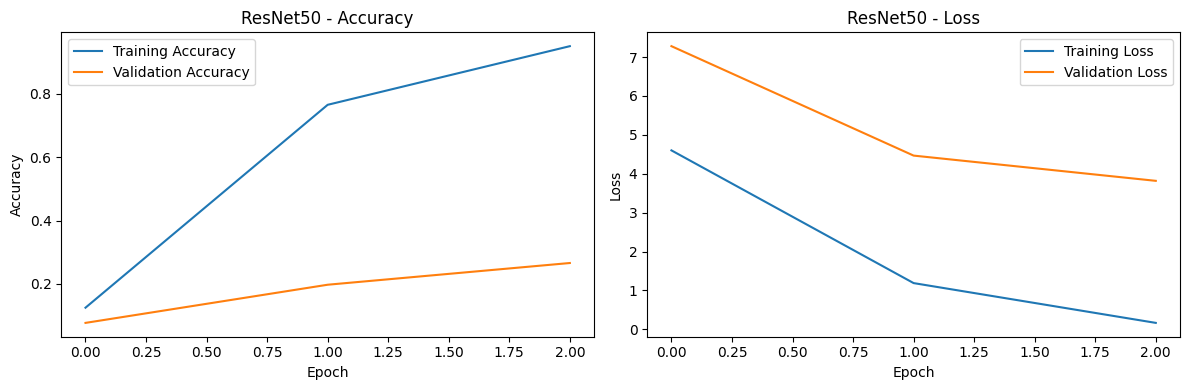

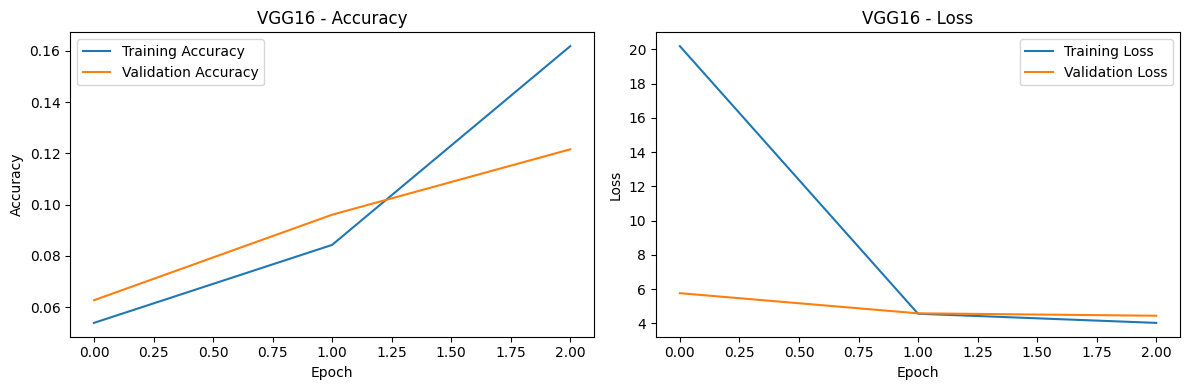

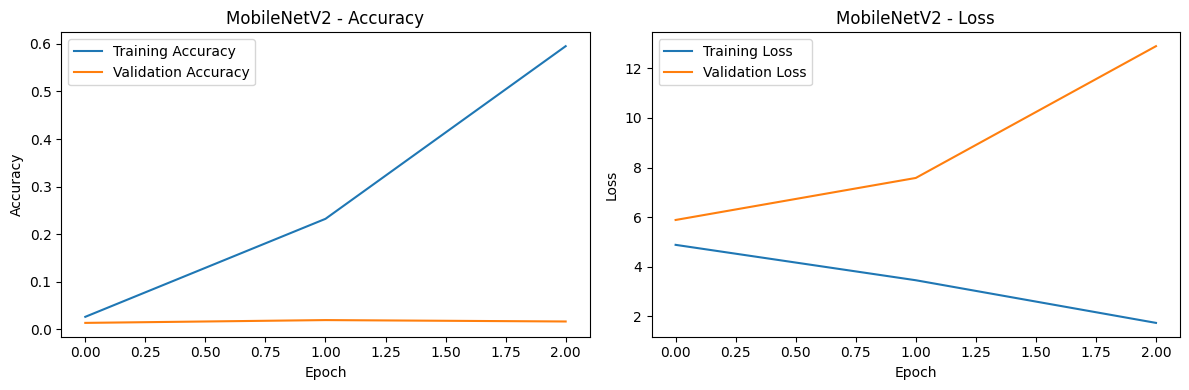

In [18]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')